# MGPGG Analysis Functionality

## Imports

In [1]:
import pandas as pd
from analysis_utils import (gen_avg_invest_per_group_per_treatment_list, 
                            gen_first_period_list,
                            gen_investment_avg_invest_per_period,
                            gen_avg_invest_plots,
                            gen_invest_subsets,
                            gen_avg_investment_per_participant_all_treatments,
                            gen_gender_split,
                            gen_data_panel_ols)
from stat_tests_utils import (gen_t_stat,
                              gen_tukey_test,
                              gen_kruskal_wallis_and_conover_iman)
from regression_utils import (gen_panel_ols)

## Code Test

### Read Data

In [2]:
mgpggdf = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_all_sessions.csv')

/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_23637/463833470.py:1: DtypeWarning: Columns (215,216) have mixed types. Specify dtype option on import or set low_memory=False.
  mgpggdf = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/zBigData/mgpgg_df_all_sessions.csv')


In [ ]:
mgpggdf

### Avg Invest per treatment 

In [4]:
avg_list = gen_avg_invest_per_group_per_treatment_list(mgpggdf)
avg_list

[{'treatment': 'single',
  'average_investment': 8.705625,
  'investment_std': 6.261667002916205},
 {'treatment': 'split',
  'avg_blue_investment': 4.45625,
  'std_blue': 3.353932986666462,
  'avg_green_investment': 4.41,
  'std_green': 3.3166285616020956,
  'avg_both': 8.86625,
  'std_both': 3.3348917829707996},
 {'treatment': 'shared',
  'avg_blue_investment': 6.78,
  'std_blue': 5.680274284527741,
  'avg_green_investment': 4.5875,
  'std_green': 4.263209248404869,
  'avg_both': 11.3675,
  'std_both': 5.139502939562342}]

### Avg invest 1st period

In [5]:
first_period_avg_invest = gen_first_period_list(mgpggdf)
first_period_avg_invest

[{'treatment': 'single',
  'average_investment': 10.2375,
  'investment_std': 5.263304420012347},
 {'treatment': 'split',
  'avg_blue_investment': 6.3375,
  'std_blue': 2.6764029800073836,
  'avg_green_investment': 6.2625,
  'std_green': 2.6564645296838343,
  'avg_both': 12.600000000000001,
  'std_both': 2.658320271650254},
 {'treatment': 'shared',
  'avg_blue_investment': 6.875,
  'std_blue': 3.300843773984641,
  'avg_green_investment': 6.3625,
  'std_green': 2.8562334673925305,
  'avg_both': 13.2375,
  'std_both': 3.08755235741006}]

# Avg invest per period

In [6]:
singlePP = gen_investment_avg_invest_per_period(mgpggdf, 'single')
singlePP

{'period_1': 10.2375,
 'period_2': 11.625,
 'period_3': 11.8625,
 'period_4': 10.6875,
 'period_5': 9.875,
 'period_6': 10.35,
 'period_7': 8.7,
 'period_8': 8.8625,
 'period_9': 8.8375,
 'period_10': 8.0625,
 'period_11': 8.9,
 'period_12': 8.9375,
 'period_13': 7.9375,
 'period_14': 7.5375,
 'period_15': 7.8375,
 'period_16': 7.175,
 'period_17': 7.075,
 'period_18': 7.1125,
 'period_19': 6.45,
 'period_20': 6.05}

In [7]:
splitBlue, splitGreen, splitPP = gen_investment_avg_invest_per_period(mgpggdf, 'split')
splitPP

{'period_1': 12.600000000000001,
 'period_2': 12.9,
 'period_3': 12.225000000000001,
 'period_4': 10.875,
 'period_5': 10.6125,
 'period_6': 10.2875,
 'period_7': 9.5625,
 'period_8': 9.4625,
 'period_9': 7.625,
 'period_10': 9.025,
 'period_11': 9.1125,
 'period_12': 7.5625,
 'period_13': 7.1875,
 'period_14': 6.925,
 'period_15': 6.7125,
 'period_16': 7.237500000000001,
 'period_17': 7.225,
 'period_18': 6.4125,
 'period_19': 7.2125,
 'period_20': 6.5625}

In [8]:
sharedBlue, sharedGreen, sharedPP = gen_investment_avg_invest_per_period(mgpggdf, 'shared')
sharedPP

{'period_1': 13.2375,
 'period_2': 14.625,
 'period_3': 14.2,
 'period_4': 13.8875,
 'period_5': 13.2875,
 'period_6': 12.212499999999999,
 'period_7': 12.825,
 'period_8': 12.625,
 'period_9': 12.0,
 'period_10': 10.925,
 'period_11': 10.325,
 'period_12': 10.5,
 'period_13': 10.0875,
 'period_14': 10.625,
 'period_15': 10.3375,
 'period_16': 10.100000000000001,
 'period_17': 9.5625,
 'period_18': 9.2375,
 'period_19': 8.95,
 'period_20': 7.8}

#### Plots 

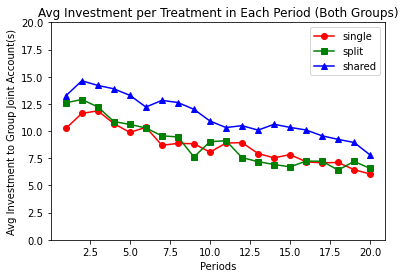

In [9]:
gen_avg_invest_plots(mgpggdf, singlePP, splitPP, sharedPP)

# Grouped Period Avgs

In [10]:
singleTrend = gen_invest_subsets(singlePP)
singleTrend

{'period_1': 10.2375,
 'period_2_to_10': 9.87361111111111,
 'period_11_to_20': 7.501249999999999}

In [11]:
splitTrend = gen_invest_subsets(splitPP)
splitTrend

{'period_1': 12.600000000000001,
 'period_2_to_10': 10.286111111111113,
 'period_11_to_20': 7.215000000000001}

In [12]:
sharedTrend = gen_invest_subsets(sharedPP)
sharedTrend

{'period_1': 13.2375,
 'period_2_to_10': 12.954166666666667,
 'period_11_to_20': 9.7525}

# Avg Invest Per Participant

In [13]:
single_per_participant, split_per_participant, shared_per_participant = gen_avg_investment_per_participant_all_treatments(mgpggdf)

In [14]:
single_per_participant

participant.code
02yoiini     1.50
0j7kfhln    12.20
3glo2sut    14.35
3k4ystev    11.00
3t1yd76e     4.80
            ...  
yk6lhwal     6.10
zah11a93    13.65
zlggycpg     7.00
ztrzsad5     5.20
zu546g9a     7.90
Name: player.investment, Length: 80, dtype: float64

In [15]:
split_per_participant

participant.code
0ann0bvh     8.20
23a2mmhm    10.55
2kukmydw     8.50
2pdifgop     1.40
3ujhueug     8.35
            ...  
y9eborjq     0.00
yx3p0b6v     7.35
zelu4yvk    12.20
znwkezuw    10.40
zx92uamy     7.70
Length: 80, dtype: float64

In [16]:
shared_per_participant

participant.code
0wj4te8u    20.00
14prhddm    19.95
1e0xptl3     8.45
1ef36mxh     6.05
29tlrw6l    15.40
            ...  
zjk0f1ye    12.00
zkquw8f4    10.30
zl7cdh1u    10.40
znlu9jpg    12.40
zq928mn2    13.35
Length: 80, dtype: float64

## Statistical Test

### t-tests

In [17]:
singleSplitTTest = gen_t_stat(single_per_participant, split_per_participant)

t-statistic: -0.26651769340755815
p-value: 0.7902117308991055
Fail to reject the null hypothesis: No evidence that the means are different


In [18]:
splitSharedTTest = gen_t_stat(split_per_participant, shared_per_participant)

t-statistic: -3.718599195105081
p-value: 0.0002922879250957225
Reject the null hypothesis: The means are different


In [19]:
singleSharedTTest = gen_t_stat(single_per_participant, shared_per_participant)

t-statistic: -3.5980649841252768
p-value: 0.00043157425359019404
Reject the null hypothesis: The means are different


### Tukey mult comparison

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
shared single  -2.6619 0.0003 -4.2516 -1.0721   True
shared  split  -2.5012 0.0008  -4.091 -0.9115   True
single  split   0.1606 0.9692 -1.4291  1.7504  False
----------------------------------------------------


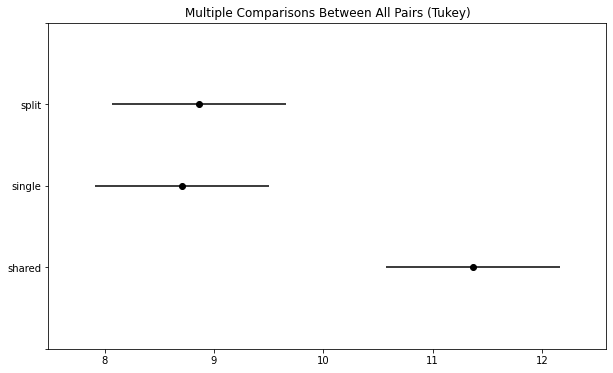

In [20]:
gen_tukey_test(single_per_participant, split_per_participant, shared_per_participant)

### Non-parametric multiple comparison

In [21]:
gen_kruskal_wallis_and_conover_iman(single_per_participant, split_per_participant, shared_per_participant)

Kruskal-Wallis H-test statistic: 17.739860195976302
P-value: 0.00014055241222744451
Conover-Iman posthoc test with Bonferroni adjustment:
          shared  single     split
shared  1.000000  0.0002  0.002346
single  0.000200  1.0000  1.000000
split   0.002346  1.0000  1.000000


### Gender Difference

In [22]:
femaleDf, maleDf = gen_gender_split(mgpggdf)

In [23]:
genderTStat, genderPValue = gen_t_stat(femaleDf, maleDf)

t-statistic: -0.7096966706334112
p-value: 0.47906360731436126
Fail to reject the null hypothesis: No evidence that the means are different


## Regressions

### panel ols

In [24]:
indices = ['participant.code', 'subsession.round_number']
depVarSingle = 'player.investment'
indepVar = ['RoumdIndep']

In [25]:
singleData = mgpggdf.loc[:, ['pgg_treatment_applied','participant.code', 'player.investment', 'subsession.round_number'] ]
singleData = singleData.loc[singleData['pgg_treatment_applied'] == 'single']
singleData['RoumdIndep'] = singleData['subsession.round_number']
singleData

,pgg_treatment_applied,participant.code,player.investment,subsession.round_number,RoumdIndep
0,single,byr62fae,12.0,1,1
1,single,byr62fae,16.0,2,2
2,single,byr62fae,20.0,3,3
3,single,byr62fae,20.0,4,4
4,single,byr62fae,20.0,5,5
...,...,...,...,...,...
1595,single,3k4ystev,10.0,16,16
1596,single,3k4ystev,10.0,17,17
1597,single,3k4ystev,0.0,18,18
1598,single,3k4ystev,0.0,19,19


In [26]:
singleRegression = gen_panel_ols(singleData,indices, depVarSingle, indepVar)

                          PanelOLS Estimation Summary                           
Dep. Variable:      player.investment   R-squared:                        0.1090
Estimator:                   PanelOLS   R-squared (Between):           -2.22e-16
No. Observations:                1600   R-squared (Within):               0.1090
Date:                Thu, Sep 28 2023   R-squared (Overall):              0.0587
Time:                        15:45:34   Log-likelihood                   -4617.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      185.81
Entities:                          80   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                  F(1,1519)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             185.81
                            

In [27]:
indices = ['participant.code', 'subsession.round_number']
depVarSingle = 'player.personal_account'
indepVar = ['RoumdIndep']

In [28]:
sharedData = mgpggdf.loc[:, ['pgg_treatment_applied','participant.code', 'player.personal_account', 'subsession.round_number'] ]
sharedData = sharedData.loc[sharedData['pgg_treatment_applied'] == 'shared']
sharedData['RoumdIndep'] = sharedData['subsession.round_number']
sharedData

,pgg_treatment_applied,participant.code,player.personal_account,subsession.round_number,RoumdIndep
3200,shared,znlu9jpg,6.0,1,1
3201,shared,znlu9jpg,2.0,2,2
3202,shared,znlu9jpg,5.0,3,3
3203,shared,znlu9jpg,8.0,4,4
3204,shared,znlu9jpg,12.0,5,5
...,...,...,...,...,...
4795,shared,w9zef9ad,5.0,16,16
4796,shared,w9zef9ad,4.0,17,17
4797,shared,w9zef9ad,6.0,18,18
4798,shared,w9zef9ad,4.0,19,19


In [29]:
sharedRegression = gen_panel_ols(sharedData,indices, depVarSingle, indepVar)

                             PanelOLS Estimation Summary                             
Dep. Variable:     player.personal_account   R-squared:                        0.1538
Estimator:                        PanelOLS   R-squared (Between):            1.11e-16
No. Observations:                     1600   R-squared (Within):               0.1538
Date:                     Thu, Sep 28 2023   R-squared (Overall):              0.0702
Time:                             15:45:43   Log-likelihood                   -4576.6
Cov. Estimator:                 Unadjusted                                           
                                             F-statistic:                      276.03
Entities:                               80   P-value                           0.0000
Avg Obs:                            20.000   Distribution:                  F(1,1519)
Min Obs:                            20.000                                           
Max Obs:                            20.000   F-statist

In [29]:
#panelData = gen_data_panel_ols(mgpggdf, indices, depVarSingle,indepVar)